**Business Task:**

Analyze FitBit Fitness Tracker App data to gain insights into how consumers are using the FitBit app and discover trends and insights for the marketing team.

**Business Objectives:**

*  What are the trends identified?
*  How could these trends apply to customers?
*  How could these trends help influence marketing strategy?

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

**Preparing the data**

Loading dataframes to read CSV files



In [4]:
dailyActivity = pd.read_csv('/content/dailyActivity_merged.csv')
sleepDay = pd.read_csv('/content/sleepDay_merged.csv')
weightLog = pd.read_csv('/content/weightLogInfo_merged.csv')
heartrate = pd.read_csv('/content/heartrate_seconds_merged.csv')
dailyCalories = pd.read_csv('/content/dailyCalories_merged.csv')
dailyIntensities = pd.read_csv('/content/dailyIntensities_merged.csv')
dailySteps = pd.read_csv('/content/dailySteps_merged.csv')
hourlyCalories = pd.read_csv('/content/hourlyCalories_merged.csv')
hourlyIntensities = pd.read_csv('/content/hourlyIntensities_merged.csv')
hourlySteps = pd.read_csv('/content/hourlySteps_merged.csv')
minuteCaloriesNarrow = pd.read_csv('/content/minuteCaloriesNarrow_merged.csv')
minuteCaloriesWide = pd.read_csv('/content/minuteIntensitiesNarrow_merged.csv')
minuteIntensitiesNarrow = pd.read_csv('/content/minuteIntensitiesNarrow_merged.csv')
minuteIntensitiesWide = pd.read_csv('/content/minuteIntensitiesWide_merged.csv')
minuteSleep = pd.read_csv('/content/minuteSleep_merged.csv')


Checking how many unique users are there in the dataset

In [5]:
print("Daily Activity Dataset:",dailyActivity.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepDay.Id.nunique(), "unique users")
print("Weight Log Dataset:",weightLog.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heartrate.Id.nunique(), "unique users")
print("Hourly Calories Dataset:", hourlyCalories.Id.nunique(), "unique users")
print("Hourly Intensities Dataset:", hourlyIntensities.Id.nunique(), "unique users")
print("Hourly Steps Dataset:", hourlySteps.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Weight Log Dataset: 8 unique users
Heart Rate Dataset: 14 unique users
Hourly Calories Dataset: 33 unique users
Hourly Intensities Dataset: 33 unique users
Hourly Steps Dataset: 33 unique users


Looking into the datasets of the files by considering 3 columns of all datasets...

In [6]:
dailyActivity.head(3)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [7]:
heartrate.head(3)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105


In [8]:
weightLog.head(3)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000


In [9]:
sleepDay.head(3)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442


In [10]:
hourlySteps.head(3)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151


In [11]:
hourlyCalories.head(3)

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59


In [12]:
hourlyIntensities.head(3)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667


How many rows and columns are there in each dataframe?

In [13]:
dailyActivity.shape

(940, 15)

In [14]:
sleepDay.shape

(413, 5)

In [15]:
weightLog.shape

(67, 8)

In [16]:
heartrate.shape

(2483658, 3)

Checking datatypes in the datasets

In [17]:
dailyActivity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [18]:
weightLog.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [19]:
sleepDay.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [20]:
hourlyCalories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [21]:
hourlyIntensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [22]:
hourlySteps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

Statistics of dataset

In [23]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [24]:
sleepDay.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [25]:
weightLog.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [26]:
heartrate.describe()

,Id,Value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [27]:
hourlySteps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [28]:
hourlyIntensities.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


In [29]:
hourlyCalories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


Checking for empty fields in the datasets

In [30]:
dailyActivity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [31]:
weightLog.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [32]:
dailyCalories.isnull().sum()

Id             0
ActivityDay    0
Calories       0
dtype: int64

In [33]:
dailyIntensities.isnull().sum()

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

In [34]:
dailySteps.isnull().sum()

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

In [35]:
sleepDay.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [36]:
heartrate.isnull().sum()

Id       0
Time     0
Value    0
dtype: int64

In [37]:
hourlyCalories.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

Checking duplicates values

In [38]:
dailyActivity.duplicated().sum()

0

In [39]:
dailySteps.duplicated().sum()

0

In [40]:
dailyIntensities.duplicated().sum()

0

In [41]:
dailyCalories.duplicated().sum()

0

In [42]:
heartrate.duplicated().sum()

0

In [43]:
weightLog.duplicated().sum()

0

In [44]:
sleepDay.duplicated().sum()

3

In [45]:
sleepDay.shape

(413, 5)

In [46]:
sleepDay = sleepDay.drop_duplicates()

In [47]:
sleepDay.duplicated().sum()

0

In [48]:
sleepDay.shape

(410, 5)

Now, no duplicated values are there in datasets

Renaming Date and Time columns to maintain consistency

Data Formatting: As per the datatypes of dataframe are of Object type but we need to change it to datetime type to perform calculation...

In [49]:
dailyActivity = dailyActivity.rename(columns={'ActivityDate': 'Date'})

sleepDay = sleepDay.rename(columns={'SleepDay': 'Date'})

hourlySteps = hourlySteps.rename(columns={'ActivityHour' : 'Time'})

hourlyCalories = hourlyCalories.rename(columns={'ActivityHour' : 'Time'})

Creating Day of the Week column

In [50]:
# Assuming 'Date' is a string column
dailyActivity['Date'] = pd.to_datetime(dailyActivity['Date'])

# Now you can use the .dt accessor
dailyActivity['DayOfWeek'] = dailyActivity['Date'].dt.day_name()

In [51]:
# Assuming 'Time' is a string column
hourlySteps['Time'] = pd.to_datetime(hourlySteps['Time'])

# Now you can use the .dt accessor
hourlySteps['DayOfWeek'] = hourlySteps['Time'].dt.day_name()


Merging datasets

In [56]:
# Assuming 'Date' is a string column in sleepDay
sleepDay['Date'] = pd.to_datetime(sleepDay['Date'])

# Now perform the merge
data_merged = pd.merge(dailyActivity, sleepDay, on='Date')

# Renaming certain columns for readability
data_merged = data_merged.rename(columns={'Id_x': 'Id_Activity'})

data_merged.head(3)

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546


In [57]:
# Assuming 'Date' is datetime64[ns] in dailyActivity
# Convert 'Date' to datetime in sleepDay
sleepDay['Date'] = pd.to_datetime(sleepDay['Date'])

# Now perform the merge
data_merged = pd.merge(dailyActivity, sleepDay, on='Date')

# Renaming certain columns for readability
data_merged = data_merged.rename(columns={'Id_x': 'Id_Activity'})
data_merged.head(3)

,Id_Activity,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1503960366,1,327,346
1,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1927972279,3,750,775
2,1503960366,2016-04-12,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,2026352035,1,503,546


In [63]:
# Assuming 'Id' is a numeric column (integer or float)
hourlySteps['Id'] = hourlySteps['Id'].astype(str)
hourlyCalories['Id'] = hourlyCalories['Id'].astype(str)

# Assuming 'Time' is a string column in hourlySteps and hourlyCalories
hourlySteps['Time'] = pd.to_datetime(hourlySteps['Time'])
hourlyCalories['Time'] = pd.to_datetime(hourlyCalories['Time'])

In [64]:
hourly_merged = pd.merge(hourlySteps, hourlyCalories, on=['Time', 'Id'])
hourly_merged.head()

,Id,Time,StepTotal,DayOfWeek,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


In [65]:
# Convert 'Time' column to datetime in both DataFrames
hourlySteps['Time'] = pd.to_datetime(hourlySteps['Time'])
hourlyCalories['Time'] = pd.to_datetime(hourlyCalories['Time'])

# Now perform the merge
hourly_merged = pd.merge(hourlySteps, hourlyCalories, on=['Time', 'Id'])
hourly_merged.head()



,Id,Time,StepTotal,DayOfWeek,Calories
0,1503960366,2016-04-12 00:00:00,373,Tuesday,81
1,1503960366,2016-04-12 01:00:00,160,Tuesday,61
2,1503960366,2016-04-12 02:00:00,151,Tuesday,59
3,1503960366,2016-04-12 03:00:00,0,Tuesday,47
4,1503960366,2016-04-12 04:00:00,0,Tuesday,48


Finding how many days were recorded on this dataframe.

In [66]:
hourly_merged['Time'].max() - hourly_merged['Time'].min()

Timedelta('30 days 15:00:00')

Analysing and Visualising datasets

How many steps do our users take daily? How active are they? Does the total number of steps have any correlation to the amount of burned calories?

In [75]:
dailyActivity.agg(
    {'TotalSteps': ['mean', 'min', 'max'],
     'Calories': ['mean', 'min', 'max'],
    })

,TotalSteps,Calories
mean,7637.910638,2303.609574
min,0.000000,0.000000
max,36019.000000,4900.000000


The average of total daily steps by the users is 7,638 steps..

n order to compare daily steps to an activity level, the following categories can be considered:

**Inactive** - Less than 5,000 steps/day
**Average** - Between 7,500 and 9,999 steps/day
**Very Active** - More than 12,500 steps/day

Relationship between the total number of steps and calories:

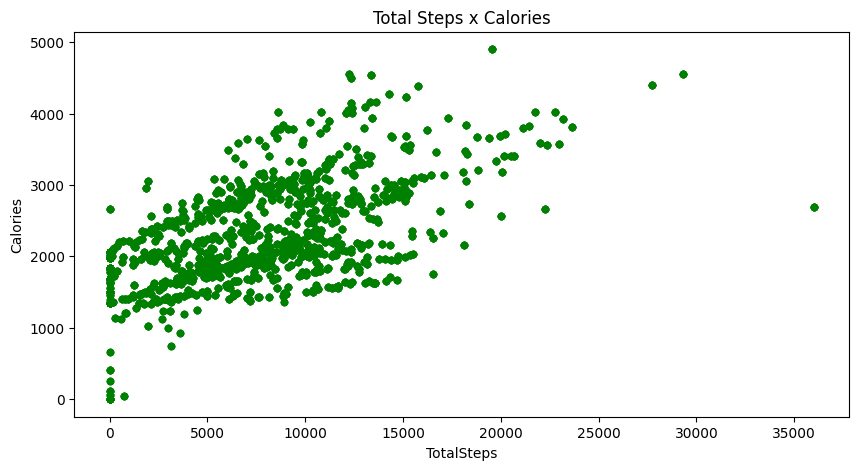

In [84]:
data_merged.plot.scatter(x='TotalSteps', y='Calories', color='green', alpha=0.5, figsize=(10,5))
plt.title('Total Steps x Calories')
plt.show()

**Analyzing Total Steps by Day of the Week**

Are the users consistent on the number of total steps taken throughout the week? Or are there significant changes as the days go by?

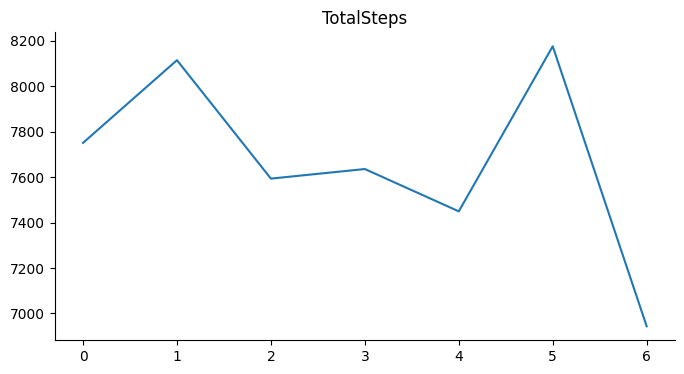

In [80]:
from matplotlib import pyplot as plt
_df_2['TotalSteps'].plot(kind='line', figsize=(8, 4), title='TotalSteps')
plt.gca().spines[['top', 'right']].set_visible(False)

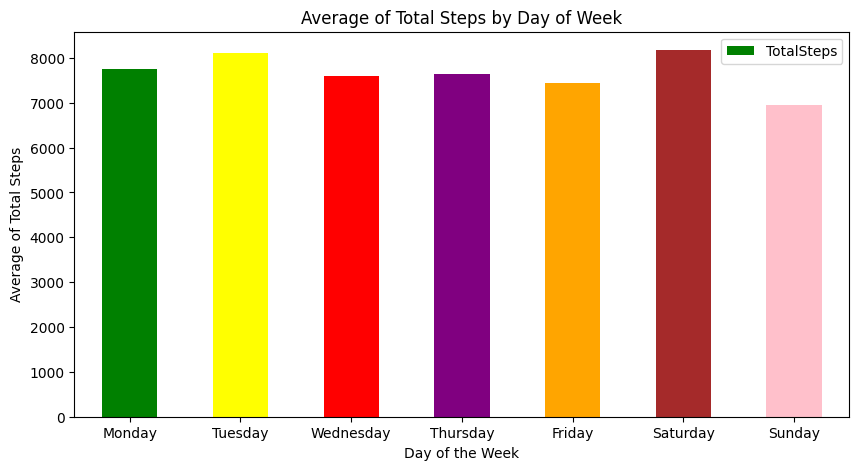

In [105]:
df_weekday['TotalSteps'].plot.bar(xlabel='Day of the Week', ylabel='Average of Total Steps', title='Average of Total Steps by Day of Week', legend=True, rot=0, figsize=(10,5), color=['green','yellow', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.show()

We can see that the most active day in terms of steps taken is Saturday, followed by Tuesday. The least active day is Sunday - most likely a rest day for the users.

**Analyzing the Most Active Time of Day**

What are the most active hours of the users' day on average? Are they occurring during the day or at night?

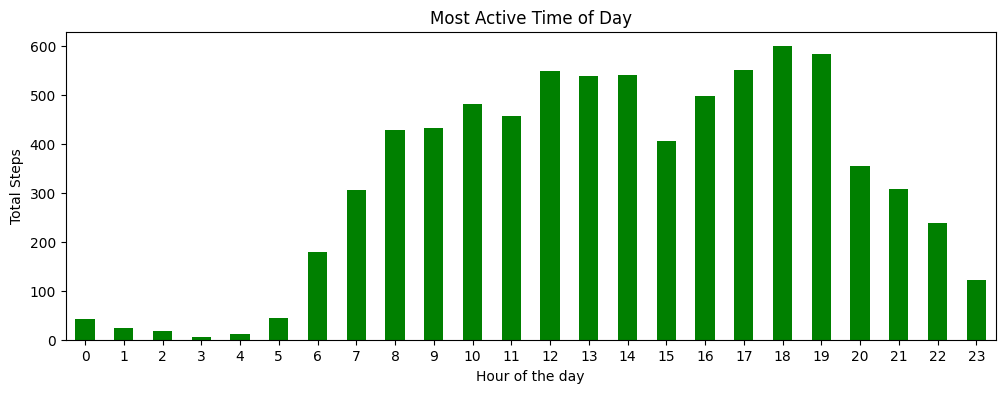

In [106]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='green', title='Most Active Time of Day')
plt.xlabel("Hour of the day")
plt.ylabel("Total Steps")
plt.show()

This bar graph tells us that the users tend to start becoming more active between 7 and 8 am. The level of activity stays doesn't change dramatically throughout the day, but the peak hours seem to occur between 6 and 7 pm. Our users are likely choosing to work out after work/school hours.

**Analyzing the Time of Day Users Burn the Most Calories**

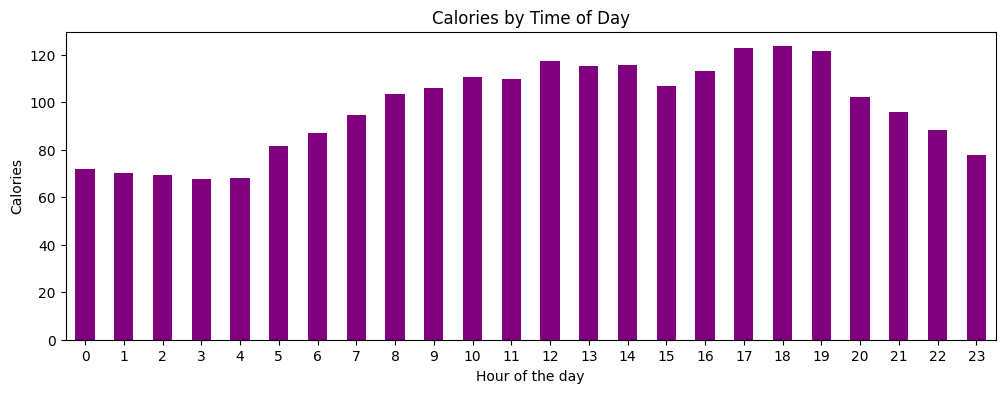

In [107]:
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged.groupby(hourly_merged['Time'].dt.hour)['Calories'].mean().plot(kind='bar', rot=0, ax=axs, color='purple', title='Calories by Time of Day')
plt.xlabel("Hour of the day")
plt.ylabel("Calories")
plt.show()

**Analyzing the Different Categories of Activity**

* How active are the users throughout the day?
* Do they spend a significant portion of their day being very active or, perhaps, not active enough?

In [109]:
dailyActivity.agg(
    {'VeryActiveMinutes': ['mean', 'min', 'max'],
     'FairlyActiveMinutes': ['mean', 'min', 'max'],
     'LightlyActiveMinutes': ['mean', 'min', 'max'],
     'SedentaryMinutes': ['mean', 'min', 'max'],
    })

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
mean,21.164894,13.564894,192.812766,991.210638
min,0.000000,0.000000,0.000000,0.000000
max,210.000000,143.000000,518.000000,1440.000000


They spend about 3.2 hours of their day being Lightly Active, 23 minutes being Fairly Active, and 35 minutes being Very Active.

**Average of Minutes Spent in Each Activity Category**

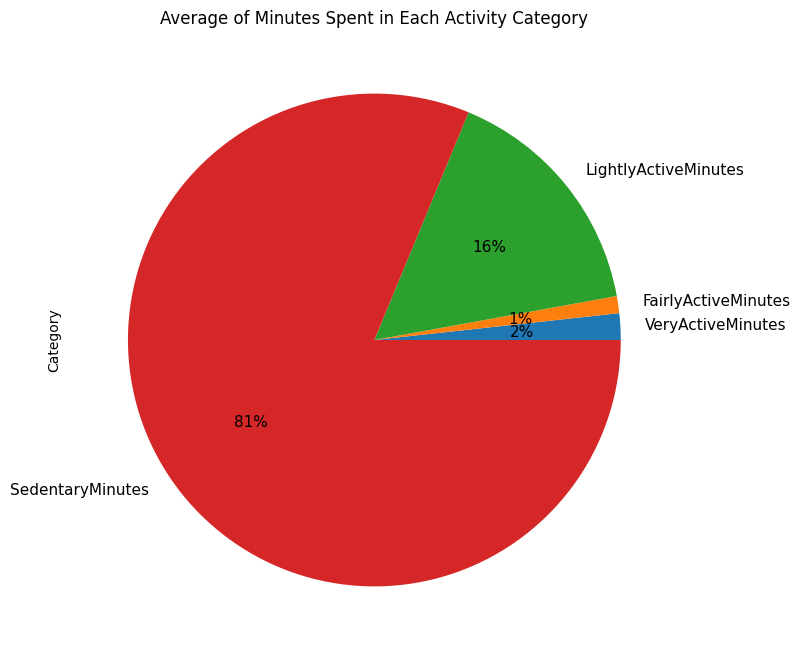

In [110]:
minutes_categories = data_merged[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
minutes_categories.plot.pie(ylabel='Category', title='Average of Minutes Spent in Each Activity Category',autopct='%1.0f%%', fontsize='11', startangle=0, figsize=(10,8))
plt.show()

Users are being very active for over 30 minutes every day, they are still spending an enormous amount of time being sedentary, which could result in future health issues.

**Sleep Day**

In [111]:
sleepDay.agg(
    {'TotalMinutesAsleep': ['mean', 'min', 'max'],
     'TotalTimeInBed': ['mean', 'min', 'max'],
    })

,TotalMinutesAsleep,TotalTimeInBed
mean,419.173171,458.482927
min,58.000000,61.000000
max,796.000000,961.000000


Our users' sleeping time is 419.5 minutes (or 7 hours). We can conclude that they have good sleeping habits.

And the average total time spent in bed is 458.6 minutes (or 7.6 hours).

**Total Minutes Asleep x Total Time in Bed**

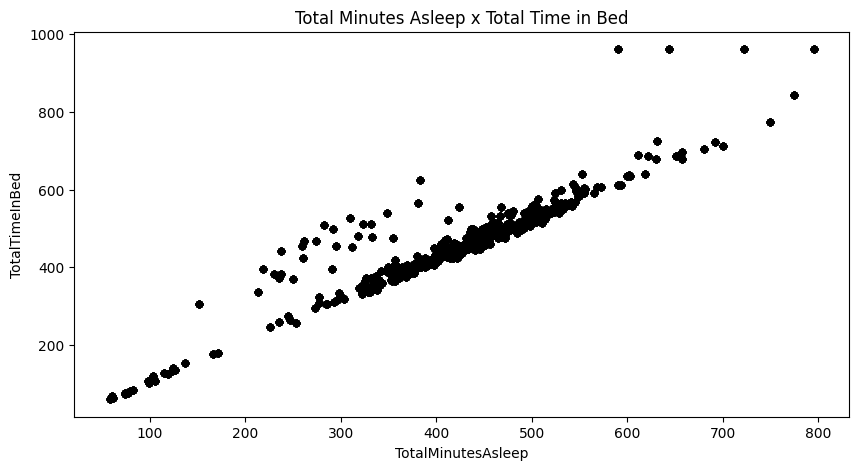

In [112]:
data_merged.plot.scatter(x='TotalMinutesAsleep', y='TotalTimeInBed', color='black', alpha=0.5, figsize=(10,5))
plt.title('Total Minutes Asleep x Total Time in Bed')
plt.show()

 Most users are usually in bed only when they are sleeping, and not much longer before or after that. However, at times, they do spend a larger amount of time in bed without being asleep. This could be related to the weekends when many people choose to sleep in or relax.

**Average of Minutes Asleep by Day of the Week**

In [113]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
data_merged['DayOfWeek'] = data_merged['DayOfWeek'].astype(cat_type)
df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)
df_weekday.filter(['TotalMinutesAsleep'])

<ipython-input-113-a7039ee0cb1b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday = data_merged.copy().groupby(data_merged['DayOfWeek']).mean().reindex(cats)


,TotalMinutesAsleep
DayOfWeek,
Monday,418.947750
Tuesday,404.815617
Wednesday,434.566434
Thursday,400.463604
Friday,405.504155
Saturday,419.140678
Sunday,453.702051


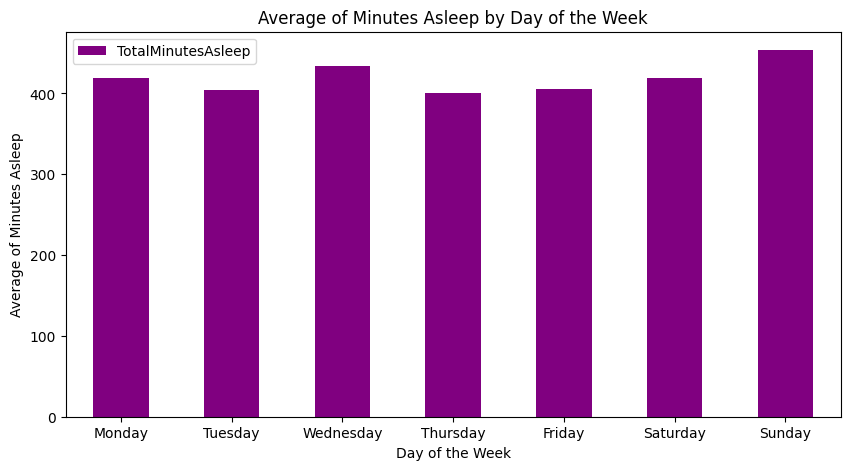

In [116]:
df_weekday['TotalMinutesAsleep'].plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes Asleep',
                                          title='Average of Minutes Asleep by Day of the Week', legend=True, rot=0, color= 'purple', figsize=(10,5))
plt.show()

 The average Total Minutes Asleep goes above the 400-minute mark - 419.8 minutes to be exact - with Sunday (7.6 hours) and Wednesday (7.2 hours) being the days where the users seem to have slept the most.

 By analyzing the bar graph above, we can see that Sunday records the highest number of the Total Minutes Asleep average.

**Analyzing Awake Time in Bed by Day of the Week**

In [117]:
df_weekday.filter(['TotalMinutesAsleep', 'TotalTimeInBed'])
df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed']]
df_weekday['AwakeTimeInBed'] = df_weekday['TotalTimeInBed'] - df_weekday['TotalMinutesAsleep']
time_bed = df_weekday[['TotalMinutesAsleep', 'TotalTimeInBed', 'AwakeTimeInBed']]
time_bed

,TotalMinutesAsleep,TotalTimeInBed,AwakeTimeInBed
DayOfWeek,,,
Monday,418.947750,456.958636,38.010885
Tuesday,404.815617,443.471033,38.655416
Wednesday,434.566434,470.421578,35.855145
Thursday,400.463604,434.254517,33.790914
Friday,405.504155,445.150693,39.646537
Saturday,419.140678,459.907345,40.766667
Sunday,453.702051,504.556695,50.854644


In [118]:
# Average Awake Time in Bed
time_bed['AwakeTimeInBed'].mean()

39.654315401416575

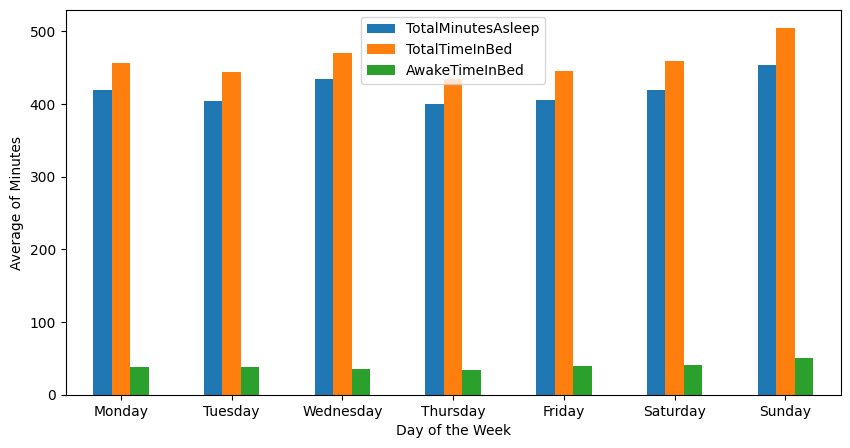

In [119]:
# Plotting the Graph
time_bed.plot.bar(xlabel='Day of the Week', ylabel='Average of Minutes', rot=0, figsize=(10,5))
plt.show()

The users are very consistent with their time in bed throughout the days of the week, and the same goes for the time they are awake in bed. From their total time in bed, they spend, on average, 39.5 minutes awake.

The longest recorded times occurred on the weekend, which is perfectly understandable.